In [1]:
# Importing the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model selection library
from sklearn.model_selection import train_test_split

# Model Building libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Scaling library
from sklearn.preprocessing import StandardScaler

# Cross validation
from sklearn.model_selection import cross_val_score

# Model Evaluation libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Importing folium to see map
import folium

In [2]:
# Setting option to see all columns at once

pd.set_option('display.max_columns', None)

# Setting grid n background for visualization

sns.set_style('whitegrid')

## Approach:

#### 1) EDA
#### 2) Data Pre-processing
#### 4) Model Building
#### 5) Model Evaluation

In [3]:
# Reading CSV file 

car = pd.read_csv('vehicles_data.csv')

In [4]:
# Check first 5 rows from dataset

car.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [5]:
# Checking shape of dataset

print(car.shape)

print('\nThere are {} records and {} features.'.format(car.shape[0], car.shape[1]))

(25000, 26)

There are 25000 records and 26 features.


In [6]:
# Summary of dataset 

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            25000 non-null  int64  
 1   url           25000 non-null  object 
 2   region        25000 non-null  object 
 3   region_url    25000 non-null  object 
 4   price         25000 non-null  int64  
 5   year          25000 non-null  float64
 6   manufacturer  24197 non-null  object 
 7   model         24745 non-null  object 
 8   condition     14618 non-null  object 
 9   cylinders     14810 non-null  object 
 10  fuel          24863 non-null  object 
 11  odometer      25000 non-null  float64
 12  title_status  24710 non-null  object 
 13  transmission  24943 non-null  object 
 14  VIN           16162 non-null  object 
 15  drive         17705 non-null  object 
 16  size          6512 non-null   object 
 17  type          19620 non-null  object 
 18  paint_color   18400 non-nu

#### From the Summary we can observe that there are 7 Numerical features & 19 Categorical features.

In [7]:
# Getting Descriptive Statistics of Numerical Features.

car.describe().round(2)

,id,price,year,odometer,county,lat,long
count,2.500000e+04,25000.00,25000.00,25000.00,0.0,24913.00,24913.00
mean,7.311343e+09,19814.19,2013.07,85699.97,NaN,38.16,-110.33
std,4.507832e+06,15361.09,5.74,62389.38,NaN,9.39,19.73
min,7.301591e+09,0.00,1990.00,0.00,NaN,-81.84,-158.60
25%,7.307769e+09,7900.00,2010.00,32641.75,NaN,33.41,-119.44
50%,7.312296e+09,17220.00,2015.00,75636.50,NaN,34.62,-111.80
75%,7.315379e+09,29590.00,2017.00,125950.75,NaN,36.84,-92.36
max,7.316901e+09,100000.00,2020.00,300000.00,NaN,64.99,173.89


#### We can see that the minimum value of 'Price' and 'Odometer' feature is zero. 
#### But in real world scenario we know the price and odometer cannot be zero of used cars. So we will get rid of these in Data Cleaning.

## Data Cleaning

### Steps :

1. Dropping unwanted columns like id, url, region_url, VIN, image_url, description, posting_date.
2. Setting a threshold for 'price' and 'odometer' feature to get rid of low values.
3. Handling the missing values.
4. Check duplicate values.

In [8]:
# Creating a copy of original dataset

df = car.copy()

In [9]:
# Check first 5 rows from copy dataset

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [10]:
# Drop unwanted columns.

df.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'posting_date'], axis = 1, inplace = True)

In [11]:
# Checking dataset after dropping unwanted columns.

df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,NaN,al,32.590,-85.4800
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,NaN,al,32.590,-85.4800
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,NaN,al,32.590,-85.4800
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,NaN,al,32.590,-85.4800
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,NaN,al,32.592,-85.5189


In [12]:
# Set threshold value for 'price' & 'odometer'.

# Price >= 1000
# Odometer >= 1000

df = df[(df['price'] >= 1000) & (df['odometer'] >= 1000)]

In [13]:
# Check shape of new dataset

print(df.shape)

print('\nThere new dataset has {} records and {} features.'.format(df.shape[0], df.shape[1]))

(22118, 19)

There new dataset has 22118 records and 19 features.


In [14]:
# Getting Descriptive Statistics of Final Dataset.

df.describe().round(2)

,price,year,odometer,county,lat,long
count,22118.00,22118.00,22118.00,0.0,22073.00,22073.00
mean,22028.83,2012.97,87341.85,NaN,38.48,-110.74
std,14482.33,5.77,62085.35,NaN,9.73,20.17
min,1000.00,1990.00,1000.00,NaN,-81.84,-158.60
25%,10499.00,2010.00,33653.00,NaN,33.40,-119.70
50%,19500.00,2014.00,78013.50,NaN,34.62,-111.80
75%,30499.75,2017.00,127701.00,NaN,38.23,-92.35
max,98995.00,2020.00,300000.00,NaN,64.99,-74.28


In [15]:
# Check for missing values.

# Get missing values in %
missing = df.isnull().sum()/len(df)*100

missing.nlargest(19).to_frame().style.background_gradient(cmap = 'Blues')

,0
county,100.000000
size,74.423546
condition,40.071435
cylinders,39.063206
drive,27.809929
paint_color,24.545619
type,19.197034
manufacturer,2.875486
title_status,1.193598
model,0.944932


#### There's lot of features in the dataset which has missing values. The 'county' feature has 100% missing values & 'size' feature has 74% missing values which is the most among all.

1. We will drop the feature which has more that 50% of missing values.
2. For features less than 50% missing values we will replace it.

In [16]:
# Drop feature with more than 50% null values

df.drop(['county', 'size'], axis = 1, inplace = True)

# Reset index

df.reset_index(drop = True, inplace = True)

In [17]:
# Check unique values of all caregorical features.

# Get all actegorical features in a list. 
cat_fea = [i for i in df.columns if df[i].dtypes == 'O']

# Print all unqiue values. 
for feature in cat_fea:
    num_unique = df[feature].nunique()
    unique = df[feature].unique()
    mode = df[feature].mode()
    print()
    print('Number of unique values :', num_unique)
    print()
    print('Unique values of ', feature, ': ', unique)
    print()
    print('Mode :', mode[0], '\n')
    print('-'*100)


Number of unique values : 29

Unique values of  region :  ['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera']

Mode : tucson 

----------------------------------------------------------------------------------------------------

Number of unique values : 38

Unique values of  manufacturer :  ['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'chrysler' 'volvo' 'audi'
 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' nan 'acura' 'hyundai' 'buick'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mer

In [18]:
# Rplacing null values.

for i in df.columns:
    if df[i].isnull().sum() > 1:
        if df[i].dtype == 'O':
            mode = df[i].mode()
            df[i] = np.where(df[i].isnull(), mode, df[i])        # Rplacing categorical null values with mode.
        else:
            median = df[i].median()
            df[i] = np.where(df[i].isnull(), median, df[i])      # Rplacing numerical null values with median.

In [19]:
# Check again for null values

df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

#### Now that we have handled all the missing values we can proceed for further analysis.

In [20]:
# Check for any duplicate values.

df[df.duplicated()]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
352,birmingham,3399,2006.0,buick,lacrosse,good,6 cylinders,gas,160218.0,clean,automatic,fwd,sedan,blue,al,33.455361,-86.962474
355,birmingham,3900,2009.0,hyundai,elantra,good,4 cylinders,gas,162005.0,clean,automatic,rwd,sedan,white,al,33.455361,-86.962474
358,birmingham,3300,1999.0,chrysler,300m,good,6 cylinders,gas,162026.0,clean,automatic,fwd,sedan,white,al,33.455361,-86.962474
376,birmingham,3999,2003.0,infiniti,g35 sedan,good,6 cylinders,gas,233830.0,clean,automatic,rwd,sedan,white,al,33.455361,-86.962474
383,birmingham,2550,2004.0,cadillac,srx,good,6 cylinders,gas,224105.0,clean,automatic,rwd,SUV,white,al,33.455361,-86.962474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22106,fresno / madera,15995,2015.0,kia,optima ex,good,4 cylinders,gas,75290.0,clean,automatic,fwd,sedan,grey,ca,36.744394,-119.789278
22107,fresno / madera,3600,1994.0,nissan,sentra,good,6 cylinders,gas,103000.0,clean,manual,4wd,sedan,white,ca,36.791800,-119.880100
22108,fresno / madera,17995,2018.0,chevrolet,impala ls,good,4 cylinders,gas,67000.0,clean,automatic,fwd,sedan,black,ca,36.744394,-119.789278
22111,fresno / madera,10700,2011.0,honda,civic ex coupe,excellent,4 cylinders,gas,171457.0,clean,automatic,fwd,coupe,silver,ca,36.770363,-119.699929


#### There are 3329 duplicate rows in the dataset. We should drop the duplicate values.

In [21]:
# Drop all duplicate values.

df.drop_duplicates(inplace = True)

# Reset index after dropping.

df.reset_index(drop = True, inplace = True)

In [22]:
# Check first 5 rows

df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,al,32.590,-85.4800
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,al,32.590,-85.4800
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,al,32.590,-85.4800
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red,al,32.590,-85.4800
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592,-85.5189


In [23]:
# Get present 'year'

today = date.today()

# Create a new feature 'car_age' from 'year' feature.

df['car_age'] = today.year - df['year'].astype(int)

In [24]:
# Drop 'year' feature

df.drop('year', axis = 1, inplace = True)

In [25]:
# Check dataset after dropping 'year' feature

df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,car_age
0,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,al,32.590000,-85.480000,7
1,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,al,32.590000,-85.480000,11
2,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,al,32.590000,-85.480000,1
3,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red,al,32.590000,-85.480000,4
4,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592000,-85.518900,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18784,fresno / madera,6200,hyundai,sonata gls 4dr sedan,excellent,4 cylinders,gas,169540.0,clean,automatic,fwd,sedan,grey,ca,36.770363,-119.699886,12
18785,fresno / madera,13500,ford,workhorse stepvan,like new,6 cylinders,diesel,221000.0,clean,automatic,4wd,sedan,white,ca,37.105900,-120.280200,18
18786,fresno / madera,3000,honda,accord,good,6 cylinders,gas,226000.0,clean,automatic,4wd,sedan,black,ca,36.791800,-119.880100,21
18787,fresno / madera,14777,hyundai,elantra,good,4 cylinders,gas,99275.0,clean,automatic,fwd,sedan,silver,ca,36.790784,-119.789897,2


## Data Analysis

### 1. Univariate Analysis

#### We will see Distribution of Numerical Features.

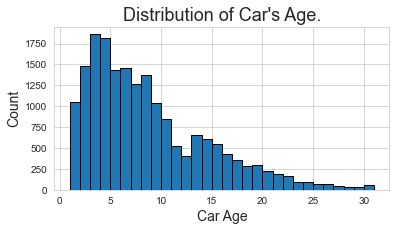

In [28]:
# Plotting histogram 

plt.figure(figsize = (6, 3))
plt.hist(df['car_age'], bins = 30, edgecolor = 'black')
plt.title("Distribution of Car's Age.", fontsize = 18)
plt.xlabel('Car Age', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

#### We can see that the 'Distribution of Car Age' is positively skewed. Most of the cars  fall in the range 1- 8 year's old.  

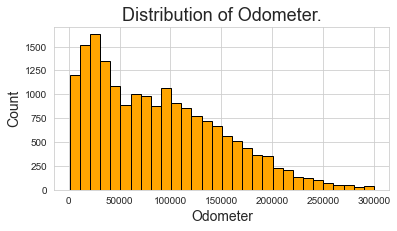

In [27]:
# Plotting histogram 

plt.figure(figsize = (6, 3))
plt.hist(df['odometer'], bins = 30, edgecolor = 'black', color = 'orange')
plt.title("Distribution of Odometer.", fontsize = 18)
plt.xlabel('Odometer', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

#### We can see that the 'Distribution of Odometer' is positively skewed. Most of the cars has travelled distance between range 

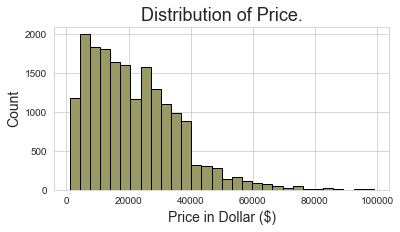

In [29]:
# Plotting histogram 

plt.figure(figsize = (6, 3))
plt.hist(df['price'], bins = 30, edgecolor = 'black', color = '#999966')
plt.title("Distribution of Price.", fontsize = 18)
plt.xlabel("Price in Dollar ($)", fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

#### We will see Count of Cateorical Features.

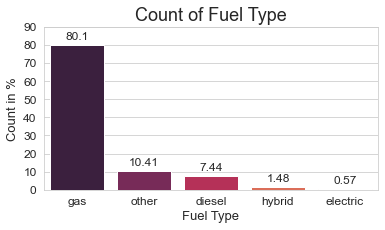

gas         80.10
other       10.41
diesel       7.44
hybrid       1.48
electric     0.57
Name: fuel, dtype: float64


In [30]:
# Get count of fuel in %
fuel = (df['fuel'].value_counts()/len(df['fuel'])*100).round(2)

# Plotting bar graph
plt.figure(figsize = (6, 3))
sns.barplot(x = fuel.keys(), y = fuel.values, palette = 'rocket')
plt.title('Count of Fuel Type', fontsize = 18)
plt.xlabel('Fuel Type', fontsize = 13)
plt.ylabel('Count in %', fontsize = 13)
plt.xticks(fontsize = 12)
plt.yticks(np.arange(0,100,10), fontsize = 12)

# plotting values on top of bar
for i in range(len(fuel.keys())):
    plt.text(i, fuel[i]+3, fuel[i], ha = 'center', size = 12)

plt.show()

print(fuel)

#### The most of the Cars has 'gas' as there fuel type. Around 80% of Cars are of 'gas' and remaining 20% Cars are of different fuel type. 

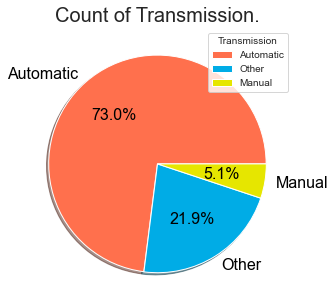

automatic    73.0
other        21.9
manual        5.1
Name: transmission, dtype: float64


In [31]:
# Get count of transmission in %
transmission = (df['transmission'].value_counts()/len(df['transmission'])*100).round(1)

# Plotting pie chart 
plt.figure(figsize = (5,5))
plt.pie(transmission, labels = ['Automatic', 'Other', 'Manual'], autopct = '%1.1f%%', textprops = dict(color = 'black', size = 16), explode = [0.001, 0.001, 0.001], colors = ['#ff704d', '#00ace6', '#e6e600'], shadow = True)
plt.legend(title = 'Transmission', loc = 'best')
plt.title('Count of Transmission.', fontsize = 20)
plt.show()

print(transmission)

#### Around 73% Cars has 'Automatic' transmission  while 22% Cars has 'Other' as transmission & only 5% Cars has 'Manual' transmisson.

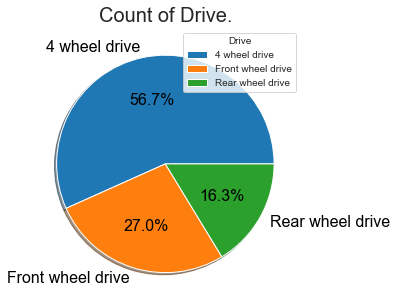

4wd    56.7
fwd    27.0
rwd    16.3
Name: drive, dtype: float64


In [37]:
# Get count of drive in %
drive = (df['drive'].value_counts()/len(df['drive'])*100).round(1)

# Plotting pie chart
plt.figure(figsize = (5,5))
plt.pie(drive, labels = ['4 wheel drive', 'Front wheel drive', 'Rear wheel drive'], autopct = '%1.1f%%', textprops = dict(color = 'black', size = 16), shadow = True)
plt.legend(title = 'Drive')
plt.title('Count of Drive.', fontsize = 20)
plt.show()

print(drive)

#### Around 56% Cars has '4wheeldrive' while 27% Cars has 'Frontwheeldrive'  & only 16% Cars has 'Rearwheeldrive'.

### 2. Bivariate Analysis

### Bivariate Analysis of Numerical Features.

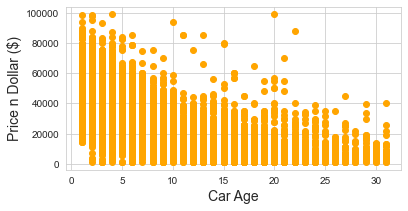

In [38]:
# Plotting scatter plot to see relationship between 'car_age' & 'price' feature.

plt.figure(figsize = (6, 3))
plt.scatter(df['car_age'], df['price'], color = 'orange')
plt.xlabel('Car Age', fontsize = 14)
plt.ylabel('Price n Dollar ($)', fontsize = 14)
plt.show()

#### From graph we can see there's negative correlation between 'Car Age' & 'Price'. As age of car increases the price decreases.

#### Cars less than 10 years old has the highest price. 

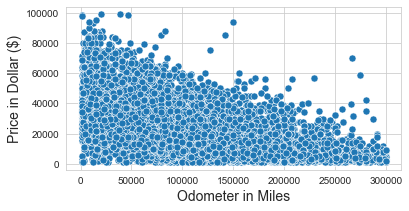

In [39]:
# Plotting scatter plot to see relationship between 'odometer' & 'price' feature.

plt.figure(figsize = (6, 3))
sns.scatterplot(x = df['odometer'], y = df['price'], s = 50)
plt.xlabel('Odometer in Miles', fontsize = 14)
plt.ylabel('Price in Dollar ($)', fontsize = 14)
plt.show()

#### Here also we can see there's negative correlation between 'Odometer' & 'Price'.

#### Cars driven less than 50000  miles has the highest price. 

### Bivariate Analysis of Categorical Features.

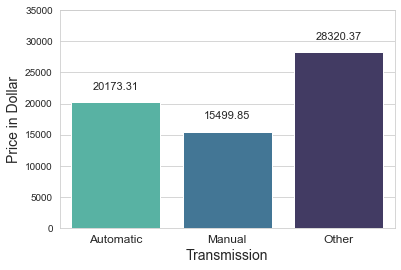

transmission
automatic    20173.31
manual       15499.85
other        28320.37
Name: price, dtype: float64


In [66]:
# Get mean price of transmission
trans_price = df.groupby('transmission')['price'].mean().round(2)

# Plotting bar graph
plt.figure(figsize = (6, 4))
sns.barplot(x = trans_price.keys(), y = trans_price.values, palette = 'mako_r')
#plt.title('Count of Fuel Type', fontsize = 20)
plt.xlabel('Transmission', fontsize = 14)
plt.ylabel('Price in Dollar', fontsize = 14)
plt.xticks(ticks = [0, 1, 2], labels = ['Automatic', 'Manual', 'Other'], fontsize = 12)
plt.yticks(np.arange(0,40000,5000), fontsize = 10)

# Plotting values on top of bar
for i in range(len(trans_price.keys())):
    plt.text(i, trans_price[i]+2000, trans_price[i], ha = 'center', size = 11)

plt.show()

print(trans_price)

#### The average price of  cars whose transmission is 'Other' is 28320.37. The average price for 'Automatic'  cars is 20173.31 dollar & for 'Manual' its 15499.85

#### Among all 'Other' has the highest price.

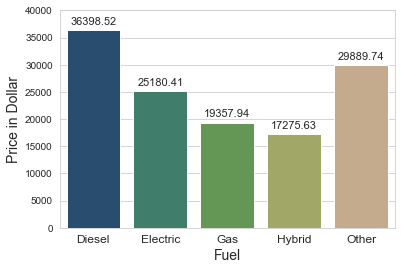

fuel
diesel      36398.52
electric    25180.41
gas         19357.94
hybrid      17275.63
other       29889.74
Name: price, dtype: float64


In [65]:
# Get mean price of fuel
fuel_price = df.groupby('fuel')['price'].mean().round(2)

# Plotting bar graph
plt.figure(figsize = (6, 4))
sns.barplot(x = fuel_price.keys(), y = fuel_price.values, palette = 'gist_earth')
#plt.title('Count of Fuel Type', fontsize = 20)
plt.xlabel('Fuel', fontsize = 14)
plt.ylabel('Price in Dollar', fontsize = 14)
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Diesel', 'Electric', 'Gas', 'Hybrid', 'Other'], fontsize = 12)
plt.yticks(np.arange(0,45000,5000), fontsize = 10)

# Plotting values on top of bar
for i in range(len(fuel_price.keys())):
    plt.text(i, fuel_price[i]+1000, fuel_price[i], ha = 'center', size = 11)

plt.show()

print(fuel_price)

#### The price of 'Diesel' cars are high. The average price of 'Diesel' car  is 36398.52. 

#### The price of 'Hybrid' cars are low. The average price of 'Hybrid' car  is 36398.52. 

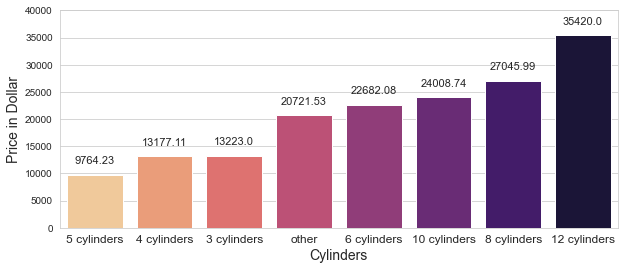

cylinders
5 cylinders      9764.23
4 cylinders     13177.11
3 cylinders     13223.00
other           20721.53
6 cylinders     22682.08
10 cylinders    24008.74
8 cylinders     27045.99
12 cylinders    35420.00
Name: price, dtype: float64


In [61]:
# Get mean price of cylinders
cylinders_price = (df.groupby('cylinders')['price'].mean().round(2)).nsmallest(15)

# Plotting bar graph
plt.figure(figsize = (10, 4))
sns.barplot(x = cylinders_price.keys(), y = cylinders_price.values, palette = 'magma_r')
#plt.title('Count of Fuel Type', fontsize = 20)
plt.xlabel('Cylinders', fontsize = 14)
plt.ylabel('Price in Dollar', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(np.arange(0,45000,5000), fontsize = 10)

# Plotting values on top of bar
for i in range(len(cylinders_price.keys())):
    plt.text(i, cylinders_price[i]+2000, cylinders_price[i], ha = 'center', size = 11)

plt.show()

print(cylinders_price)

#### The car with '12 cylinder' engine has the highest price & the average price of '12 cylinder' engine car is 35420. 

#### As the number of cylinders in engine increases the price also increases. 

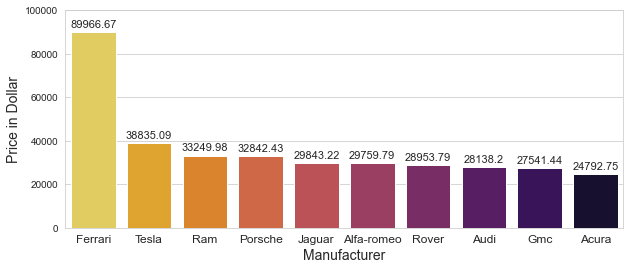

manufacturer
ferrari       89966.67
tesla         38835.09
ram           33249.98
porsche       32842.43
jaguar        29843.22
alfa-romeo    29759.79
rover         28953.79
audi          28138.20
gmc           27541.44
acura         24792.75
Name: price, dtype: float64


In [69]:
# Get mean price of manufacturer
man_price = (df.groupby('manufacturer')['price'].mean().round(2)).nlargest(10)

# Plotting bar graph
plt.figure(figsize = (10, 4))
sns.barplot(x = man_price.keys(), y = man_price.values, palette = 'inferno_r')
#plt.title('Count of Fuel Type', fontsize = 20)
plt.xlabel('Manufacturer', fontsize = 14)
plt.ylabel('Price in Dollar', fontsize = 14)
plt.xticks(ticks = np.arange(0, 10), labels = [i.capitalize() for i in man_price.keys()], fontsize = 12)
plt.yticks(np.arange(0,120000,20000), fontsize = 10)

# Plotting values on top of bar
for i in range(len(man_price.keys())):
    plt.text(i, man_price[i]+2000, man_price[i], ha = 'center', size = 11)

plt.show()

print(man_price)

#### The top 10 manufacturer whose car prices are high. The average price for 'Ferrari' cars is 89966.67 which is the highest among all.

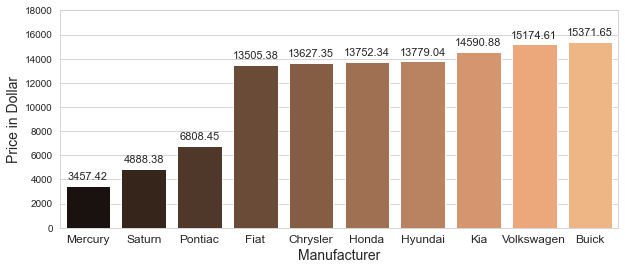

manufacturer
mercury        3457.42
saturn         4888.38
pontiac        6808.45
fiat          13505.38
chrysler      13627.35
honda         13752.34
hyundai       13779.04
kia           14590.88
volkswagen    15174.61
buick         15371.65
Name: price, dtype: float64


In [76]:
# Get mean price of manufacturer
man_price = (df.groupby('manufacturer')['price'].mean().round(2)).nsmallest(10)

# Plotting bar graph
plt.figure(figsize = (10, 4))
sns.barplot(x = man_price.keys(), y = man_price.values, palette = 'copper')
#plt.title('Count of Fuel Type', fontsize = 20)
plt.xlabel('Manufacturer', fontsize = 14)
plt.ylabel('Price in Dollar', fontsize = 14)
plt.xticks(ticks = np.arange(0, 10), labels = [i.capitalize() for i in man_price.keys()], fontsize = 12)
plt.yticks(np.arange(0,20000,2000), fontsize = 10)

# Plotting values on top of bar
for i in range(len(man_price.keys())):
    plt.text(i, man_price[i]+500, man_price[i], ha = 'center', size = 11)
    
plt.show()

print(man_price)

#### The top 10 manufacturer whose car prices are low. The average price for 'mercury' cars is 89966.673457.42 which is the highest among all.

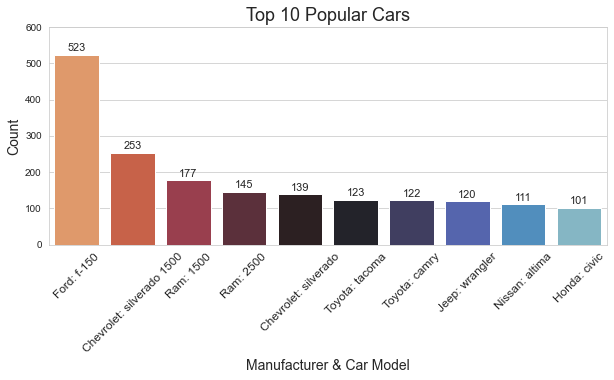

f-150             523
silverado 1500    253
1500              177
2500              145
silverado         139
tacoma            123
camry             122
wrangler          120
altima            111
civic             101
Name: model, dtype: int64


In [77]:
# Get count of 'model'
car_count = df['model'].value_counts().nlargest(10)

# Create a list
pop_car = []

# Looping through 'car_count'
for i in car_count.keys():
    name = df.loc[df['model'] == i]['manufacturer'].mode() + ': ' + i         # Concat manufacturer & model name
    pop_car.append(name[0])                                                   # Append name to list

#  Plotting bar graph
plt.figure(figsize = (10, 4))
sns.barplot(x = pop_car, y = car_count.values, palette = 'icefire_r')
plt.title('Top 10 Popular Cars', fontsize = 18)
plt.xlabel('Manufacturer & Car Model', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation = 45, ticks = np.arange(0, 10), labels = [i.capitalize() for i in pop_car], fontsize = 12)
plt.yticks(np.arange(0,700,100), fontsize = 10)

# Plotting values on top of bar
for i in range(len(pop_car)):
    plt.text(i, car_count[i]+10, car_count[i], ha = 'center', size = 11)
    
plt.show()

print(car_count)

#### The top 10 popular cars. Ford f-150 is the most popular car

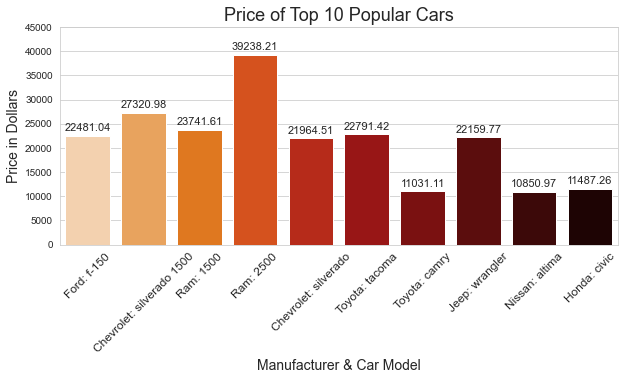

In [78]:
# Get count of 'model'
car_count = df['model'].value_counts().nlargest(10)

# Create a list
pop_car = []
pop_price = []

# Looping through 'car_count'
for i in car_count.keys():
    name = df.loc[df['model'] == i]['manufacturer'].mode() + ': ' + i          # Concat manufacturer & model name
    price = df.loc[df['model'] == i]['price'].mean()                           # Get mean price 
    
    pop_car.append(name[0])                                                    # Append name to list
    pop_price.append(round(price ,2))                                          # Append price to list

#  Plotting bar graph
plt.figure(figsize = (10, 4))
sns.barplot(x = pop_car, y = pop_price, palette = 'gist_heat_r')
plt.title('Price of Top 10 Popular Cars', fontsize = 18)
plt.xlabel('Manufacturer & Car Model', fontsize = 14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation = 45, ticks = np.arange(0, 10), labels = [i.capitalize() for i in pop_car], fontsize = 12)
plt.yticks(np.arange(0,50000,5000), fontsize = 10)

# Plotting values on top of bar
for i in range(len(pop_car)):
    plt.text(i, pop_price[i]+1000, pop_price[i], ha = 'center', size = 11)
    
plt.show()

#### The average price of top 10 popular cars. 'Ram: 2500' has the highest price which is 39238.

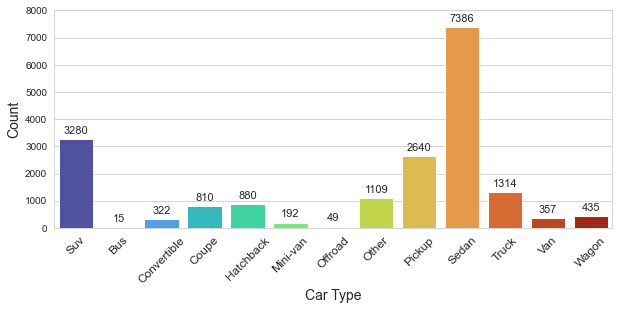

SUV            3280
bus              15
convertible     322
coupe           810
hatchback       880
mini-van        192
offroad          49
other          1109
pickup         2640
sedan          7386
truck          1314
van             357
wagon           435
Name: type, dtype: int64


In [79]:
# Get count of 'type'
type_count = df['type'].value_counts().sort_index()

# Plotting bar graph
plt.figure(figsize = (10, 4))
sns.barplot(x = type_count.keys(), y = type_count.values, palette = 'turbo')
plt.xlabel('Car Type', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(ticks = np.arange(0, 13), rotation = 45, labels = [i.capitalize() for i in type_count.keys()], fontsize = 12)
plt.yticks(np.arange(0,9000,1000), fontsize = 10)

# Plotting values on top of bar
for i in range(len(type_count)):
    plt.text(i, type_count[i]+200, type_count[i], ha = 'center', size = 11)
    
plt.show()

print(type_count)

#### The 'Sedan', 'SUV' & 'Pickup' cars hase the highest count.

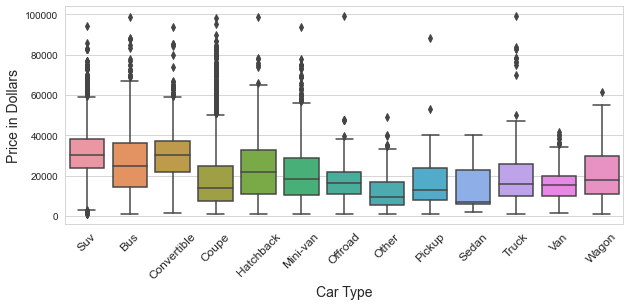

type
SUV            20502.621341
bus            14002.000000
convertible    20320.714286
coupe          23105.372840
hatchback      17435.226136
mini-van       12202.364583
offroad        17837.673469
other          30142.083859
pickup         31680.435227
sedan          17699.269835
truck          26655.704718
van            20228.512605
wagon          15778.464368
Name: price, dtype: float64


In [81]:
# Get price of 'type'
type_price = df.groupby('type')['price'].mean().sort_index()

# Plotting bar graph
plt.figure(figsize = (10, 4))
sns.boxplot(x = df['type'], y = df['price'])
plt.xlabel('Car Type', fontsize = 14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(ticks = np.arange(0, 13), rotation = 45, labels = [i.capitalize() for i in type_price.keys()], fontsize = 12)
plt.yticks(fontsize = 10)

plt.show()

print(type_price)

####  The average price of 'pickup' & 'other' car type has the highest price. The average price of 'pickup' car type is 31680.43 .

### 3. Multivariate Analysis

In [43]:
# Get mean price of transmission w.r.t fuel

trans_fuel_price = df.groupby(['transmission', 'fuel'])['price'].mean().round(2)
trans_fuel_price.to_frame().T

transmission automatic                                           manual  \
fuel            diesel  electric       gas   hybrid     other    diesel   
price         37831.21  26483.34  17600.52  15664.7  31344.31  22098.07   

transmission                                  other                      \
fuel               gas   hybrid     other    diesel  electric       gas   
price         14588.43  19990.0  18963.38  28835.26  24057.19  28135.18   

transmission                      
fuel            hybrid     other  
price         22469.35  29227.48

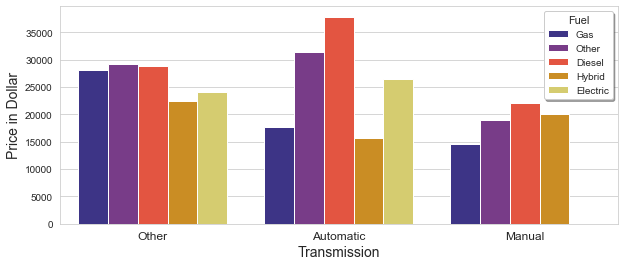

In [82]:
# Plotting bar graph

plt.figure(figsize = (10, 4))
sns.barplot(x = df['transmission'], y = df['price'], hue = df['fuel'], ci = None, palette = 'CMRmap')
#plt.title('Count of Fuel Type', fontsize = 20)
plt.xlabel('Transmission', fontsize = 14)
plt.ylabel('Price in Dollar', fontsize = 14)
plt.xticks(ticks = np.arange(0, 3), labels = [i.capitalize() for i in df['transmission'].unique()], fontsize = 12)
plt.yticks(fontsize = 10)
plt.legend(title = 'Fuel', labels = [i.capitalize() for i in df['fuel'].unique()], loc = 'upper right', title_fontsize = 11, fontsize = 10, shadow = True)
plt.show()

#### The cars with 'Automatic' & 'Manual' transmission with 'Diesel' fuel has the highest price.

In [83]:
# Creating a function to get New Dataset of region

def region_wise_data(data):
    new_region = []
    new_lat = []
    new_long = []
    count = []

    # Looping through region feature to get latitude, longitude & count vlaues 
    for i in data['region'].unique():
        lat_ = data[data['region'] == i]['lat'].value_counts().head(1).keys()[0]
        long_ = data[data['region'] == i]['long'].value_counts().head(1).keys()[0]
        value_ = len(data[data['region'] == i])
        new_region.append(i)
        new_lat.append(lat_)
        new_long.append(long_)
        count.append(value_)
    
    # Create a new dataset & return the dataset
    region_data = pd.DataFrame({'region': new_region, 'lat': new_lat, 'long': new_long, 'count': count})

    return region_data

In [84]:
# Statewise dataset with region

# Alabama State Dataset
al_state_data = region_wise_data(df[df['state'] == 'al'])

# Alaska State Dataset
ak_state_data = region_wise_data(df[df['state'] == 'ak'])

# Arizona State Dataset
az_state_data = region_wise_data(df[df['state'] == 'az'])

# Arkansas State Dataset
ar_state_data = region_wise_data(df[df['state'] == 'ar'])

# California State Dataset
ca_state_data = region_wise_data(df[df['state'] == 'ca'])

In [85]:
# Check State Dataset

al_state_data

,region,lat,long,count
0,auburn,32.590000,-85.480000,133
1,birmingham,33.520000,-86.790000,1112
2,dothan,31.230000,-85.400000,290
3,florence / muscle shoals,33.779214,-84.411811,151
4,gadsden-anniston,34.010000,-86.010000,164
5,huntsville / decatur,34.570000,-86.980000,1056
6,mobile,30.668786,-88.105874,478
7,montgomery,32.350000,-86.280000,324
8,tuscaloosa,33.230000,-87.540000,150


In [86]:
# Creating a base map
region_map = folium.Map(location = [39.33699860995735, -98.42457180194508], zoom_start = 3, tiles = 'StamenTerrain')

# Plotting count of cars in Alabama state on map 
for lat, long, name, count in zip(al_state_data['lat'], al_state_data['long'], al_state_data['region'], al_state_data['count']):
    folium.CircleMarker([lat, long], radius = count/30, popup = ('<strong> State: </strong>'+ 'Alabama' + '<br>''<strong> Region: </strong>' + str(name).capitalize() + '<br>''<strong> Count: </strong>' + str(count) + '<br>'), color = 'red', fill_color = 'red', fill_opacity = 0.2).add_to(region_map)

# Plotting count of cars in Alaska state on map 
for lat, long, name, count in zip(ak_state_data['lat'], ak_state_data['long'], ak_state_data['region'], ak_state_data['count']):
    folium.CircleMarker([lat, long], radius = count/30, popup = ('<strong> State: </strong>'+ 'Alaska' + '<br>''<strong> Region: </strong>' + str(name).capitalize() + '<br>''<strong> Count: </strong>' + str(count) + '<br>'), color = 'blue', fill_color = 'blue', fill_opacity = 0.2).add_to(region_map)

# Plotting count of cars in Arizona state on map 
for lat, long, name, count in zip(az_state_data['lat'], az_state_data['long'], az_state_data['region'], az_state_data['count']):
    folium.CircleMarker([lat, long], radius = count/30, popup = ('<strong> State: </strong>'+ 'Arizona' + '<br>''<strong> Region: </strong>' + str(name).capitalize() + '<br>''<strong> Count: </strong>' + str(count) + '<br>'), color = 'green', fill_color = 'green', fill_opacity = 0.2).add_to(region_map)

# Plotting count of cars in Arkansas state on map 
for lat, long, name, count in zip(ar_state_data['lat'], ar_state_data['long'], ar_state_data['region'], ar_state_data['count']):
    folium.CircleMarker([lat, long], radius = count/30, popup = ('<strong> State: </strong>'+ 'Arkansas' + '<br>''<strong> Region: </strong>' + str(name).capitalize() + '<br>''<strong> Count: </strong>' + str(count) + '<br>'), color = 'orange', fill_color = 'orange', fill_opacity = 0.2).add_to(region_map)

# Plotting count of cars in California state on map 
for lat, long, name, count in zip(ca_state_data['lat'], ca_state_data['long'], ca_state_data['region'], ca_state_data['count']):
    folium.CircleMarker([lat, long], radius = count/30, popup = ('<strong> State: </strong>'+ 'California' + '<br>''<strong> Region: </strong>' + str(name).capitalize() + '<br>''<strong> Count: </strong>' + str(count) + '<br>'), color = 'cyan', fill_color = 'cyan', fill_opacity = 0.2).add_to(region_map)

In [87]:
# Calling map object

region_map

## Data Preprocessing

In [88]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,car_age
0,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,al,32.590,-85.4800,7
1,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,al,32.590,-85.4800,11
2,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,al,32.590,-85.4800,1
3,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red,al,32.590,-85.4800,4
4,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592,-85.5189,8


In [89]:
# Drop unwanted columns

df.drop(['region', 'paint_color','model', 'lat', 'long'], axis = 1, inplace = True)

In [90]:
# Check dataset after dropping

df.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,car_age
0,33590,gmc,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,al,7
1,22590,chevrolet,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,al,11
2,39590,chevrolet,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,al,1
3,30990,toyota,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,al,4
4,15000,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,al,8


### Converting categorical features to numerical features.

### Here LabelEncoder is used:

In [91]:
# We will append these LabelEncoder values to list for prediction 

# Getting all categorical features
cat_fea = [i for i in df.columns if df[i].dtypes == 'O']

# Create a empty list
le = []

# Looping through 'cat_fea' variable
for i in range(len(cat_fea)):
    encoder_i = LabelEncoder()                                    # Create Label Encoder object 
    le.append(encoder_i)                                          # Append Label Encoder object to list
    df[cat_fea[i]] = encoder_i.fit_transform(df[cat_fea[i]])      # Convert categorical features to numeric

In [92]:
# Ckeck dataset

df.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,car_age
0,33590,12,2,6,2,57923.0,0,2,0,8,1,7
1,22590,6,2,6,2,71229.0,0,2,0,8,1,11
2,39590,6,2,6,2,19160.0,0,2,0,8,1,1
3,30990,35,2,6,2,41124.0,0,2,0,8,1,4
4,15000,11,0,5,2,128000.0,0,0,2,10,1,8


### Correlation Matrix

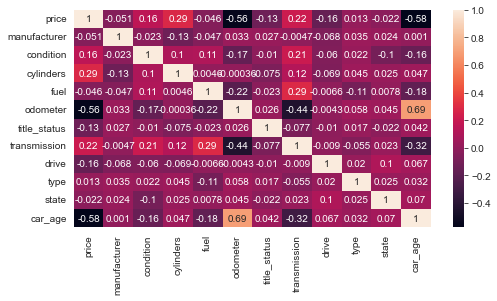

In [94]:
# Plotting HeatMap

plt.figure(figsize = (8, 4))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Model Building

In [95]:
# Filtering Independent & Dependent features.

X = df.drop('price', axis = 1)
y = df['price']

In [96]:
# Splitting the dataset for training & testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 19)

In [97]:
# Creating a function to try different ML models.

def base_model(xtrain, xtest, ytrain, ytest, model_names):
    train_score = []
    test_score = []
    mse_score = []
    mae_score = []
    mape_score = []
    train_adj_r2 = []
    test_adj_r2 = []
    
    # Looping through a list of models. 
    for name in model_names:                     
        
        model = name()                     # Create a model object
        model.fit(xtrain, ytrain)          # Training the model

        pred = model.predict(xtest)        # Predicting on test data

        train_score.append(model.score(xtrain, ytrain).round(5))               # Append train score to list
        test_score.append(model.score(xtest, ytest).round(5))                  # Append test score to list
        mae_score.append(mean_absolute_error(ytest, pred).round(5)) 
            
    # Creating a dataframe of different models with train & test scores
    dataframe = pd.DataFrame({'Base Models': ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost'], 'Train Score': train_score, 'Test Score': test_score, 'MAE': mae_score})
    
    return dataframe

In [98]:
# Create list of models 

names = [LinearRegression, Ridge, Lasso, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor, AdaBoostRegressor]

# Calling base_model function
result = base_model(X_train, X_test, y_train, y_test, names)

result

,Base Models,Train Score,Test Score,MAE
0,Linear Regression,0.53259,0.54153,7178.98059
1,Ridge,0.53259,0.54153,7178.99524
2,Lasso,0.53259,0.54152,7178.97180
3,KNN,0.56063,0.34646,8287.36115
4,Decision Tree,0.99848,0.71812,4352.21883
5,Random Forest,0.97366,0.83588,3512.34039
6,XGBoost,0.90815,0.84135,3752.61335
7,AdaBoost,0.34292,0.34114,9732.77727


#### The RandomForest & XGBoost model is performing best out of all. 

#### RandomForest was giving better results as compared to XGBoost, so I decided to go with RandomForest.

### Hyperparameter Tuning

In [99]:
# Create a random forest object

rf = RandomForestRegressor()

In [100]:
# Create a dictionary of parameters

params = {'n_estimators': [i for i in range(100, 1100, 100)],
         'max_depth': [i for i in range(5, 105, 10)],
         'max_features': ['auto', 'sqrt']}

In [101]:
#rand = RandomizedSearchCV(rf, params, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [102]:
# Create a random forest object with hyperparameters

rf_hy = RandomForestRegressor(n_estimators = 800, max_features = 'sqrt', max_depth = 45) 

# Train the model

rf_hy.fit(X_train, y_train)

# Predict on test data
pred = rf_hy.predict(X_test)

# Print first 5 predictions  
print('First 5 prediction:', pred[:5])

First 5 prediction: [ 5727.59833333 32106.58875     3997.86875    25767.58375
 34855.92291667]


In [103]:
# Print first 5 actual values  

print('Actual 5 values:\n')
print(y_test[:5])

Actual 5 values:

11165     4990
9597     31990
9360      2300
8400     24991
16909    34590
Name: price, dtype: int64


## Model Evaluation

In [104]:
# Model Score & Error

print('Train Score:', (rf_hy.score(X_train, y_train)*100).round(2), '%')
print('Test Score:', (rf_hy.score(X_test, y_test)*100).round(2),'%','\n')
print('MAE:', (mean_absolute_error(y_test, pred)).round(2))
print('RMSE:', (np.sqrt(mean_squared_error(y_test, pred))).round(2))

Train Score: 97.67 %
Test Score: 84.83 % 

MAE: 3430.2
RMSE: 5593.75


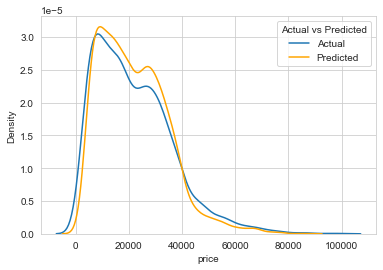

In [105]:
# Model evaluation 

sns.kdeplot(x = y_test)
sns.kdeplot(x = pred, color = 'orange')
plt.legend(title = 'Actual vs Predicted', labels = ['Actual', 'Predicted'], loc = 'upper right')

plt.show()

### Cross Validation

In [67]:
# Cross Validation 

score = cross_val_score(rf_hy, X, y, cv = 10)

In [68]:
# Cross Validation Score

print('The average accuracy of the model is'  + "\033[1m" + ' {} %'.format((score.mean().round(2))*100) + "\033[0m")

The average accuracy of the model is 82.0 %


### Save the model

In [69]:
import pickle

In [70]:
#saving model

# file = open('rf_regressor_model.pkl', 'wb')

# pickle.dump(rf_hy, file)
# file.close()                   # Always close the file after saving the model or it will throw an error 

In [71]:
Here labelencoder model is also saved for predictions 

# file = open('model_encoder.pkl', 'wb')

# pickle.dump(le, file)
# file.close()                   # Always close the file after saving the model or it will throw an error